# Covid model
This model is build drawing inspiration from SEIR model

In [2]:
"""

@author: Saransh Srivastava

-Parameter estimation of SEIR differential equation models  using Covid- 19 data

"""
import matplotlib.pyplot as plt
import math
import numpy as np
import random
import numpy as np

## Parameter setting

In [3]:
days = 100
Ppl = 100001            #entire population
S = [Ppl/2,Ppl/2]       #Group1 use preventive measures, group2 doesn't
E = [0,0]
I = 1                   #number of infected people.
D = 0                   #number of death.
R = 0                   #number of recovery
p_group = [0.6,0.4]     #Rate of people in group i. Either person takes precaution or not
p_s = 0.7               #Rate of people is normal.
lmbda = Ppl/4 + 100     #Population inflow
mu = Ppl/4              # Population outflow.
beta = 1.5              #Average risk per infected contact (R_0)
c = 1.1                 #Average contacts per person per day (function of policies & time) (<1 means no spread of disease)
sigma = 5               #Incubation rate, at which infected people develops symptoms.
M01 = 0.5       #Per capita rate of migration of suspectible people from group i to j.
M10 = 0.5
N01 = 0.5       #Per capita rate of migration of infected ones from group i to j.
N10 = 0.5
p_d = 0.3               #The probability of death.
p_r = 1- p_d            #The probability of recovery.
alpha = 0

"""
Converting above variables into parameters for the linear equation
"""

initCond = (S[0],S[1],E[0],E[1],I,R,D)

initCond

(50000.5, 50000.5, 0, 0, 1, 0, 0)

## SEIR Model Creation

In [4]:
def deriv(y,t,beta,c,p_grp,lmbda,mu,alpha,p_s,p_d,p_r):
    S[0],S[1],E[0],E[1],I,R,D=y
    dS1dt = (p_grp * p_s * (lmbda - mu)) - (beta * c * alpha * S[0] *(alpha * (E[0] + I) + E[1]))/Ppl + (M10 * S[1]) - (M01 * S[0])                       
    ds2dt = ((1-p_grp) * p_s * (lmbda - mu)) - (beta * c * S[1] *(alpha * (E[0] + I) + E[1]))/Ppl + (M01 * S[0]) - (M10 * S[1])                       
    de1dt = (p_grp * (1 - p_s) * (lmbda - mu)) + (beta * c * alpha * S[0] *(alpha * (E[0] + I) + E[1]))/Ppl + (N10 * E[1]) - ((N01 + sigma) * E[0])                       
    de2dt = ((1-p_grp) * (1 - p_s) * (lmbda - mu)) + (beta * c * S[1] *(alpha * (E[0] + I) + E[1]))/Ppl + (N01 * E[0]) - ((N10 + sigma) * E[1])                       
    didt = (sigma *(E[0] + E[1])) - (p_r + p_d) * I 
    dddt = p_d * I
    drdt = p_r * I
    return dS1dt, ds2dt, de1dt,de2dt,didt,dddt,drdt


In [5]:
from scipy.integrate import odeint
t = np.linspace(0, 49, 50) # Grid of time points (in days)

## Data import

In [6]:
import pandas as pd
covnat = "covnat.csv"
covnatdf = pd.read_csv(covnat)
covnatdf
covnatdf=covnatdf[covnatdf.cname=="Spain"]
data = covnatdf["cu_deaths"].tail(50)
data

4588        28
4662        35
4750        47
4839        84
4936       121
5052       136
5178       288
5315       309
5457       491
5605       598
5768       767
5937      1002
6110      1326
6288      1720
6471      2182
6657      2696
6848      3434
7042      4089
7237      4858
7432      5690
7627      6528
7820      7340
8017      8189
8217      9053
8418     10003
8620     10935
8821     11744
9024     12418
9227     13055
9430     13798
9634     14555
9838     15238
10043    15843
10248    16353
10453    16972
10658    17489
10863    18276
11068    18893
11273    19478
11478    20043
11683    20453
11888    20852
12093    21282
12298    21717
12503    22157
12708    22524
12913    22902
13118    23190
13324    23190
13530    23822
Name: cu_deaths, dtype: int64

## Curve Fitting

In [7]:
from scipy.optimize import curve_fit

def iModSol(t,beta,c,p_grp,lmbda,mu,alpha,p_s,p_d,p_r,initCondn):
    y0 = initCondn
    ret = odeint(deriv, y0, t,args=(beta,c,p_grp,lmbda,mu,alpha,p_s,p_d,p_r))
    S1,S2,E1,E2,I,D,R = ret.T
    return D

def ModSol(t,beta,c,p_grp,lmbda,mu,alpha,p_s,p_d,p_r):
    return iModSol(t,beta,c,p_grp,lmbda,mu,alpha,p_s,p_d,p_r,initCond)


In [8]:

a = ModSol(t,beta,c,p_group[0],lmbda,mu,alpha,p_s,p_d,p_r)
a

array([  0.        ,   2.64144785,   9.55263081,  18.24330306,
        27.59127055,  37.18143316,  46.8610606 ,  56.57396706,
        66.29948329,  76.03000569,  85.76273722,  95.49664896,
       105.23136255, 114.96673886, 124.7027267 , 134.4393074 ,
       144.17647413, 153.9142245 , 163.65255766, 173.39147341,
       183.13097176, 192.87105275, 202.61171648, 212.35296309,
       222.0947927 , 231.83720569, 241.58020193, 251.3237814 ,
       261.0679447 , 270.81269159, 280.55802203, 290.30393623,
       300.05043504, 309.7975176 , 319.54518423, 329.29343525,
       339.04227065, 348.79169058, 358.54169521, 368.29228465,
       378.04345899, 387.79521842, 397.5475631 , 407.30049317,
       417.05400877, 426.80810989, 436.56279676, 446.3180695 ,
       456.07392825, 465.83037314])

In [9]:

popt,pcov=curve_fit(ModSol,t,data)

beta_o = popt[0]
c_o = popt[1]
p_grp_o = popt[2]
lmbda_o = popt[3]
mu_o = popt[4]
alpha_o = popt[5]
p_s_o = popt[6]
p_d_o = popt[7]
p_r_o = popt[8]
# M10_o = popt[9]
# M01_o = popt[10]
# N10_o = popt[11]
# N01_o = popt[12]
# sigma_o = popt[13]
popt

/Users/saransh/anaconda3/lib/python3.6/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/saransh/anaconda3/lib/python3.6/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/saransh/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


array([ 8.56946166e-01,  8.56946166e-01,  3.90412883e+02,  1.21194966e+02,
        2.83244519e+02,  1.11239690e+00,  1.01795202e+00,  9.82967015e-01,
       -1.83037918e-01])

In [10]:
t2 = np.linspace(0, 99, 100) # Grid of time points (in days
model_final = ModSol(t2,beta_o,c_o,p_grp_o,lmbda_o,mu_o,alpha_o,p_s_o,p_d_o,p_r_o)


In [11]:
def PlotStyle(Axes,Title):
    
    Axes.spines['top'].set_visible(False)
    Axes.spines['right'].set_visible(False)
    Axes.spines['bottom'].set_visible(True)
    Axes.spines['left'].set_visible(True)
    Axes.xaxis.set_tick_params(labelsize=14)
    Axes.yaxis.set_tick_params(labelsize=14)
    Axes.set_title(Title)

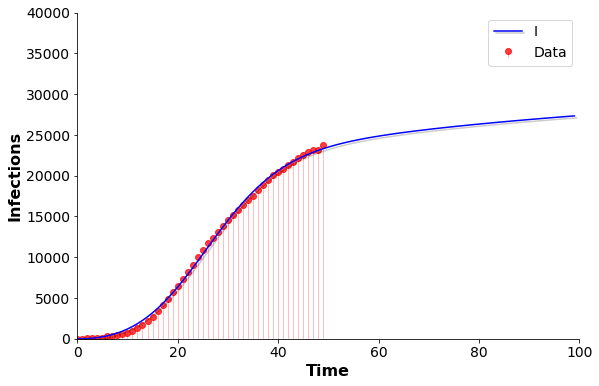

In [12]:
###
#  Curve visualization 
###

import matplotlib.patheffects as path_effects

plt.figure(2,figsize=(9,6))

(markers, stemlines, baseline) = plt.stem(t, data,bottom=-42,label='Data',basefmt=" ")
plt.setp(stemlines, linestyle="-", color="red", linewidth=0.5,alpha=0.5 )
plt.setp(markers, color="red",alpha=0.75 )
SolutionLabel = r'I'

plt.plot(t2,model_final,'b-',label=SolutionLabel,path_effects=[path_effects.SimpleLineShadow(alpha=0.2,rho=0.2),
                       path_effects.Normal()])
    
plt.xlabel('Time',fontsize=16,fontweight='bold')
plt.ylabel('Infections',fontsize=16,fontweight='bold')
plt.legend(loc=0,fontsize=14)

plt.ylim(0,40000)
plt.xlim(0,100)


ax=plt.gca()
PlotStyle(ax,'')